In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from collections import Counter

iris = load_iris()

In [2]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

iris_df['label'] = iris['target']

iris_df['species'] = iris['target']
iris_df['species'] = iris_df['species'].apply(lambda x: iris['target_names'][x])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

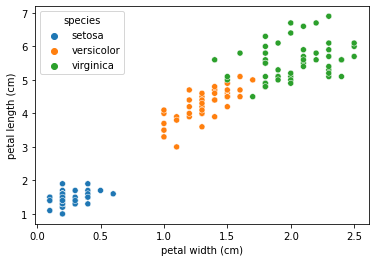

In [3]:
sns.scatterplot(x = 'petal width (cm)', y = 'petal length (cm)', hue = 'species', data = iris_df)

In [4]:
# Shuffle Data
df = iris_df.sample(frac=1)

In [5]:
df.shape

(150, 6)

In [6]:
# Slice
df_train = df.iloc[0:120, :]
df_test = df.iloc[120:, :]

In [7]:
# Split
X_train = np.array(df_train.iloc[:, :-2])
X_test = np.array(df_test.iloc[:, :-2])
y_train = np.array(df_train.iloc[:, -2])
y_test = np.array(df_test.iloc[:, -2])

### Model

In [8]:
def euclidean_distance(x1, x2):
    
    return np.sqrt(np.sum(x1-x2)**2)

def distances(x1, k=10):
    
    distances = [euclidean_distance(x1, x2) for x2 in X_train]
    
    ki = np.argsort(distances)[:k]
    
    k_labels = [y_train[i] for i in ki]
    
    most_common = Counter(k_labels).most_common(1)
    
    return most_common[0][0]

def predict(X_test):
    
    y_pred = [distances(x1) for x1 in X_test]
    
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    return accuracy

In [9]:
y_pred = predict(X_test)

In [10]:
accuracy(y_test, y_pred)

0.8666666666666667